In [1]:
import os
import pandas as pd

# List all CSV files in a folder
filePath = "./data_sets/titanic/"
files = [f for f in os.listdir(filePath) if f.endswith('.csv')]
print(files)
# # Load each file into a dictionary of DataFrames
dfs = {file: pd.read_csv(f"{filePath}{file}") for file in files}

['test.csv', 'train.csv', 'gender_submission.csv']


In [2]:
df = dfs.get("train.csv")  # Use train.csv instead
if df is not None:
    print(df.head())  # Display first few rows
else:
    print("Error: 'train.csv' not found")

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [3]:
df = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])  # Drop unnecessary columns
print(df.head())  # Check the new structure

   Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S


In [4]:
print(df.isnull().sum())  # Shows count of missing values per column

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64


In [5]:
df['Age'] = df['Age'].fillna(df['Age'].median())  # No warning

In [6]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

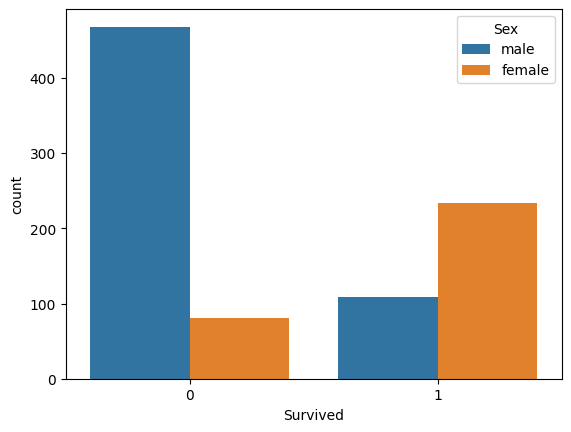

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x="Survived", hue="Sex")
plt.show()

In [8]:
print(df.dtypes)
# sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
# plt.show()

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object


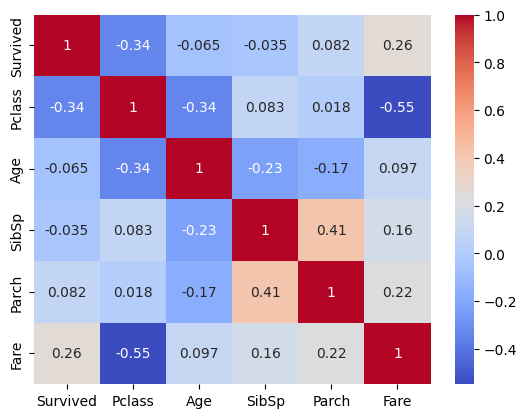

In [9]:
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap="coolwarm")
plt.show()

In [10]:
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})

In [11]:
print(df["Sex"].unique())  # Should output: [0 1]

[0 1]


In [12]:
df["Embarked"] = df["Embarked"].map({"S": 0, "C": 1, "Q": 2})

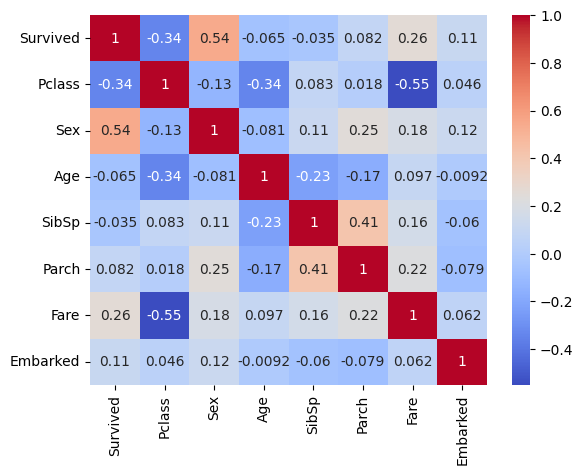

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df.corr()

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()

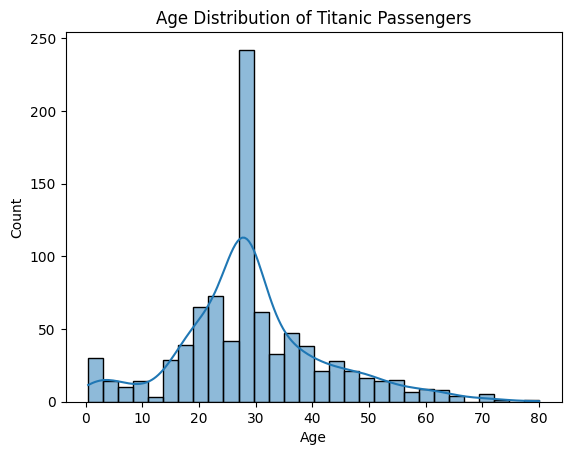

In [14]:
import matplotlib.pyplot as plt  
import seaborn as sns  

sns.histplot(df['Age'].dropna(), bins=30, kde=True)  
plt.title("Age Distribution of Titanic Passengers")  
plt.show()  

In [15]:
df["Embarked"]

0      0
1      1
2      0
3      0
4      0
      ..
886    0
887    0
888    0
889    1
890    2
Name: Embarked, Length: 891, dtype: int64

In [16]:
df = pd.get_dummies(df, columns=["Embarked"], drop_first=True)

In [17]:
print(df.head())  

   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_1  Embarked_2
0         0       3    0  22.0      1      0   7.2500       False       False
1         1       1    1  38.0      1      0  71.2833        True       False
2         1       3    1  26.0      0      0   7.9250       False       False
3         1       1    1  35.0      1      0  53.1000       False       False
4         0       3    0  35.0      0      0   8.0500       False       False


In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

In [19]:
print(df[['Age', 'Fare']].head())

        Age      Fare
0 -0.565736 -0.502445
1  0.663861  0.786845
2 -0.258337 -0.488854
3  0.433312  0.420730
4  0.433312 -0.486337


In [20]:
df['Age'].std()

np.float64(1.0005616400330457)

In [1]:
!jupyter nbconvert --to script titanic.ipynb

[NbConvertApp] Converting notebook titanic.ipynb to script
[NbConvertApp] Writing 2255 bytes to titanic.py
